# Preprocessing data quality overview
This notebooks allows to inspect preprocessed sessions, one-by-one or in batch, to asses the quailty of the preprocessing by visual inspection and metrics calculation.

Sessions that do not satisfy quality criteria can be discarded or re-preprocessed with a different set of CaImAn parameters that can be selected using [session_overview.ipynb](../session_overview.ipynb)

In [1]:
import os
import sys
sys.path.append(os.path.abspath('../'))

import caiman as cm
import numpy as np
import matplotlib.pyplot as plt
from caiman.source_extraction.cnmf.cnmf import load_CNMF
import pandas as pd
from pathlib import Path
import pickle
import glob
import gc
import seaborn as sns
import utils.data_quality as dq

2023-08-28 11:44:57.285551: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Paths and parameters

DATA_PATH = Path("/ceph/imaging1/davide/2p_data_nb10") #path to preprocessed data
RAW_DATA_PATH = Path('/ceph/imaging1/arie') # path to raw tif videos


SESSIONS = {'433557_reebok': ['20221014','20221024','20221030',
                              '20221004','20221026','20221117',
                              '20221122','20221025','20221027'],
                  
            '429420_toms': ['20221208', '20221003', '20221014', '20230213', '20230210',
                            '20221130', '20220928', '20230201',    '20221117', '20230203', 
                            '20221205', '20230211', '20230214', '20221207', '20221206', 
                            '20221209','20221210', '20221118', '20221026', '20221202', 
                            '20230202', '20221122', '20221201', '20221027', '20221115', '20221030']}


# RAW VIDEO SUMMARY IMAGES

In [11]:
dq.interactive_summary_images(data_path= DATA_PATH,sessions=SESSIONS)

interactive(children=(Dropdown(description='Animal:', options=('433557_reebok', '429420_toms'), value='433557_…

# PREPROCESSING RESULTS

#### single session estimates

In [20]:
animal = '441406_fiano'
session = '20230307'

cnmf_file = DATA_PATH.joinpath(f'{animal}/{session}/cnmf.hdf5')
cnmf = load_CNMF(cnmf_file)
ests = cnmf.estimates

metrics_file = DATA_PATH.joinpath(f'{animal}/{session}/metrics.pickle')
with open(metrics_file,'rb') as pfile:
            metrics = pickle.load(pfile)

print(f'total # of components:{len(ests.idx_components)+len(ests.idx_components_bad)}')
print(f'GOOD components:{len(ests.idx_components)}')
print(f'BAD components:{len(ests.idx_components_bad)}')


Not corrected
total # of components:1309
GOOD components:205
BAD components:1104


#### Interactive plots for multiple sessions

In [19]:
dq.interactive_contours_images(DATA_PATH,SESSIONS)

interactive(children=(Dropdown(description='Animal:', options=('441394_ribolla', '441406_fiano'), value='44139…

# Batch summary and stats

In [4]:
summary = dq.compute_batch_summary(DATA_PATH,SESSIONS,verbose=False)

File not found for 433557_reebok - 20221024, skipping
File not found for 433557_reebok - 20221030, skipping
File not found for 433557_reebok - 20221026, skipping
File not found for 433557_reebok - 20221117, skipping
File not found for 433557_reebok - 20221122, skipping
File not found for 433557_reebok - 20221025, skipping
File not found for 433557_reebok - 20221027, skipping
File not found for 429420_toms - 20221014, skipping


/scratch/dspalla/mambaforge/envs/mescore/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/dspalla/mambaforge/envs/mescore/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/scratch/dspalla/mambaforge/envs/mescore/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


File not found for 429420_toms - 20221130, skipping


/scratch/dspalla/mambaforge/envs/mescore/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/dspalla/mambaforge/envs/mescore/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/scratch/dspalla/mambaforge/envs/mescore/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


File not found for 429420_toms - 20221205, skipping


/scratch/dspalla/mambaforge/envs/mescore/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/dspalla/mambaforge/envs/mescore/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/scratch/dspalla/mambaforge/envs/mescore/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/scratch/dspalla/mambaforge/envs/mescore/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/dspalla/mambaforge/envs/mescore/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/scratch/dspalla/mambaforge/envs/mescore/li

File not found for 429420_toms - 20221207, skipping
File not found for 429420_toms - 20221206, skipping
File not found for 429420_toms - 20221209, skipping
File not found for 429420_toms - 20221210, skipping
File not found for 429420_toms - 20221118, skipping


/scratch/dspalla/mambaforge/envs/mescore/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/dspalla/mambaforge/envs/mescore/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/scratch/dspalla/mambaforge/envs/mescore/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


File not found for 429420_toms - 20221202, skipping
File not found for 429420_toms - 20221122, skipping
File not found for 429420_toms - 20221115, skipping
File not found for 429420_toms - 20221030, skipping


In [5]:
summary.head()

,n_neurons,SNR_components,r_values,cnn_preds,pixels_sn,neurons_sn,animal,date
0,158,0.812889,0.177497,0.924917,942.573364,1801.26094,433557_reebok,20221014
1,155,10.772329,0.430085,0.277846,432.331207,1179.221365,433557_reebok,20221004
2,17,5.042168,0.445075,0.762743,2685.353516,4490.231106,429420_toms,20221208
3,152,2.601113,0.621139,0.552338,678.110596,1854.212195,429420_toms,20221003
4,0,NaN,NaN,NaN,NaN,NaN,429420_toms,20230213


In [6]:
len(summary)

16

Text(0, 0.5, 'n neurons')

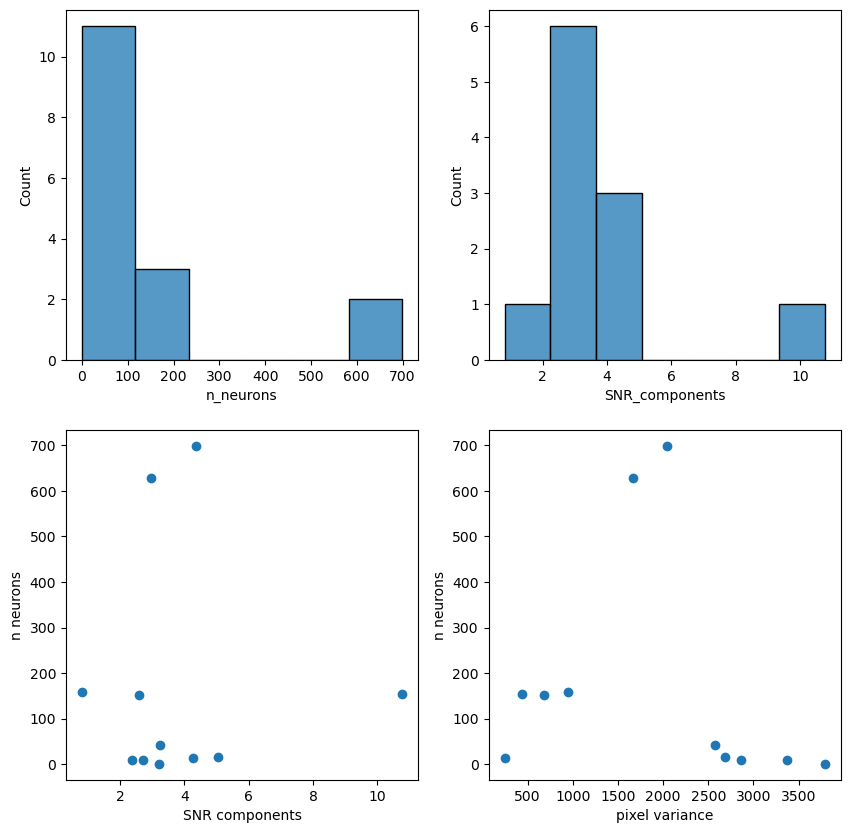

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(data=summary,x='n_neurons')

plt.subplot(2,2,2)
sns.histplot(data=summary,x='SNR_components')

plt.subplot(2,2,3)
plt.scatter(summary.SNR_components,summary.n_neurons)
plt.xlabel('SNR components')
plt.ylabel('n neurons')


plt.subplot(2,2,4)
plt.scatter(summary.pixels_sn,summary.n_neurons)
plt.xlabel('pixel variance')
plt.ylabel('n neurons')

In [8]:
def subset_good_sessions(summary_df,min_neurons=10):
    
    return  summary_df[summary_df.n_neurons > min_neurons]

def subset_bad_sessions(summary_df,min_neurons=10):
    
    return  summary_df[summary_df.n_neurons <= min_neurons]

In [9]:
subset_good_sessions(summary)

,n_neurons,SNR_components,r_values,cnn_preds,pixels_sn,neurons_sn,animal,date
0,158,0.812889,0.177497,0.924917,942.573364,1801.26094,433557_reebok,20221014
1,155,10.772329,0.430085,0.277846,432.331207,1179.221365,433557_reebok,20221004
2,17,5.042168,0.445075,0.762743,2685.353516,4490.231106,429420_toms,20221208
3,152,2.601113,0.621139,0.552338,678.110596,1854.212195,429420_toms,20221003
5,627,2.956172,0.697911,0.715136,1665.139893,3331.808812,429420_toms,20230210
6,14,4.253698,0.528864,0.450891,245.458328,470.408706,429420_toms,20220928
7,43,3.2444,0.174854,0.603628,2578.631836,5379.266618,429420_toms,20230201
13,699,4.375378,0.715947,0.737818,2047.171143,4181.436802,429420_toms,20230202


In [10]:
subset_bad_sessions(summary)

,n_neurons,SNR_components,r_values,cnn_preds,pixels_sn,neurons_sn,animal,date
4,0,NaN,NaN,NaN,NaN,NaN,429420_toms,20230213
8,10,2.368722,0.845459,0.791025,2862.981689,4942.223747,429420_toms,20221117
9,0,NaN,NaN,NaN,NaN,NaN,429420_toms,20230203
10,0,NaN,NaN,NaN,NaN,NaN,429420_toms,20230211
11,0,NaN,NaN,NaN,NaN,NaN,429420_toms,20230214
12,0,NaN,NaN,NaN,NaN,NaN,429420_toms,20221026
14,1,3.22042,0.762328,0.727127,3790.464844,4448.388239,429420_toms,20221201
15,9,2.72111,0.259585,0.704664,3369.581055,5422.716498,429420_toms,20221027


# Bacgkround components and residuals

In [5]:
animal = '441406_fiano'
date = '20230320'

with open(DATA_PATH.joinpath(f'{animal}/{date}/metrics.pickle'),'rb') as pfile:
            metrics = pickle.load(pfile)
        


cnmf_file = DATA_PATH.joinpath(f'{animal}/{date}/cnmf.hdf5')
cnmf = load_CNMF(cnmf_file)
ests = cnmf.estimates



/scratch/dspalla/mambaforge/envs/mescore/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/dspalla/mambaforge/envs/mescore/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


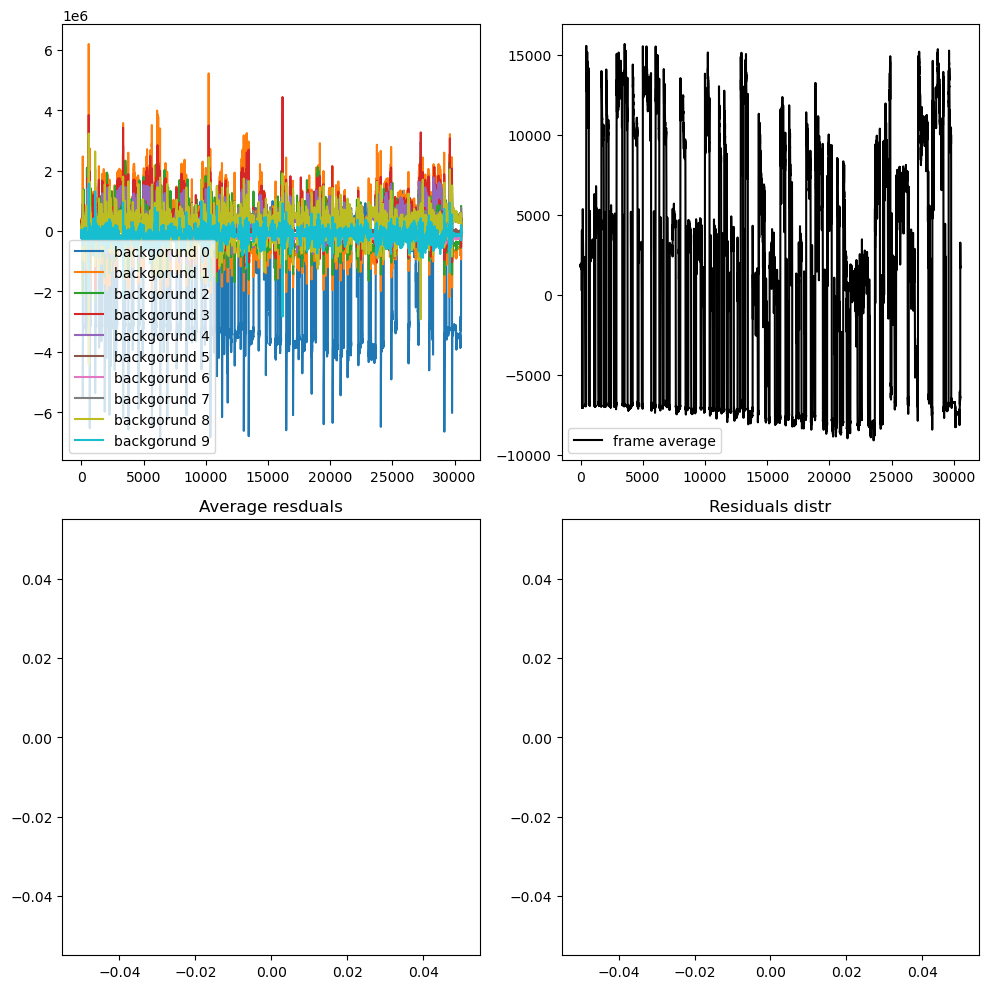

In [6]:
def estimates_visual_summary(estimates,metrics):
    
    plt.figure(figsize=(10,10))
    
    # Background plot
    
    plt.subplot(2,2,1)
    
    for i,bc in enumerate(estimates.f):
        plt.plot(bc,label=f'backgorund {i}')
        plt.legend()

        
    plt.subplot(2,2,2)
        
    x = np.asarray(metrics['frame_average'])
    plt.plot(x,c='k',label='frame average')
    plt.legend()
    
    plt.subplot(2,2,3)
    plt.title('Average resduals')
    good_components = estimates.idx_components
    plt.plot(np.mean(ests.R[good_components],axis=0))
    
    
    
    plt.subplot(2,2,4)
    plt.title('Residuals distr')
    good_components = estimates.idx_components

    sns.histplot(ests.R[good_components].ravel())
    
    plt.tight_layout()


estimates_visual_summary(ests,metrics)

# Inspect raw videos

In [7]:
from fastplotlib import ImageWidget
import tifffile
from mesmerize_core.arrays import LazyTiff
import numpy as np
import ipywidgets as widgets


In [8]:
def get_tif(animal,date):
    animal_num = animal.split('_')[0]
    session_path = data_path.joinpath(f'{animal}/{date}_{animal_num}')
    selected_tif = glob.glob(str(session_path) + '/*.tif')[0]
    
    return selected_tif
    
    
def make_inteactive_video_plot(tif_file):

        
    movie = LazyTiff(tif_file)
    
    iw = ImageWidget(
    movie,
    vmin_vmax_sliders=True,
    cmap="gnuplot2")
    
    return iw

In [17]:
data_path = RAW_DATA_PATH
sessions = SESSIONS
animals_list = list(sessions.keys())
dates_list = np.unique([item for key in sessions.keys() for item in sessions[key]])

animal = animals_list[0]
date = '20230320'

selected_tif = get_tif(animal,date)

print(selected_tif)


/ceph/imaging1/arie/441394_ribolla/20230320_441394/20230320_441394_00001.tif


In [18]:
iw = make_inteactive_video_plot(selected_tif)
iw.show()

RFBOutputContext()

/scratch/dspalla/mambaforge/envs/mescore/lib/python3.10/site-packages/mesmerize_core/arrays/_tiff.py:39: UserWarning: min not implemented for LazyTiff, returning min of 0th index
  warn("min not implemented for LazyTiff, returning min of 0th index")
/scratch/dspalla/mambaforge/envs/mescore/lib/python3.10/site-packages/mesmerize_core/arrays/_tiff.py:44: UserWarning: max not implemented for LazyTiff, returning min of 0th index
  warn("max not implemented for LazyTiff, returning min of 0th index")


In [30]:
import os

folder_path = RAW_DATA_PATH.joinpath('441393_barbaresco')
folder_list = os.listdir(folder_path)

date_list = []
for i in folder_list:
    if ('PNG' not in i) and ('DS' not in i):
        date_list.append(i.split('_')[0])

In [31]:
date_list

['20230223', '20230301', '20230308', '20230306', '20230307', '20230227']